# Recap

👇 Run the code below to import the `ML_Cars_Recap_dataset.csv` dataset ([available here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_Recap_dataset.csv)) from the data folder.

⚠️ This is not the exact same dataset as the one in exercise 3. You need to download it! ⚠️

In [47]:
# # Un-comment to download
!curl -s "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_Recap_dataset.csv" > data/ML_Cars_Recap_Dataset.csv

__CHANGE "dataset" to "Dataset"__

In [48]:
import pandas as pd

df = pd.read_csv("./data/ML_Cars_Recap_Dataset.csv")

df.head()

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,64.10000,2548.0,dohc,four,2.68,5000.0,expensive
1,std,64.10000,2548.0,dohc,four,2.68,5000.0,expensive
2,std,65.50000,2823.0,ohcv,six,3.47,5000.0,expensive
3,std,65.88794,2337.0,ohc,four,3.40,5500.0,expensive
4,std,66.40000,2824.0,ohc,five,3.40,5500.0,expensive


ℹ️ The description of the dataset is available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset_description.txt).

# Data preparation

## Duplicates

👇 Drop duplicates.

In [49]:
len(df)

205

In [50]:
df.drop_duplicates(inplace=True)

len(df)

191

## Missing data

What is the `NaN` percentage for each column?

In [51]:
df.isnull().sum()

aspiration        0
carwidth          0
curbweight        0
enginetype        0
cylindernumber    0
stroke            0
peakrpm           0
price             0
dtype: int64

## Scaling

👇 Plot boxplots and histograms of the dataset to determine your scaler.

In [52]:
df.head()

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,64.10000,2548.0,dohc,four,2.68,5000.0,expensive
2,std,65.50000,2823.0,ohcv,six,3.47,5000.0,expensive
3,std,65.88794,2337.0,ohc,four,3.40,5500.0,expensive
4,std,66.40000,2824.0,ohc,five,3.40,5500.0,expensive
5,std,66.30000,2507.0,ohc,five,3.40,5500.0,expensive


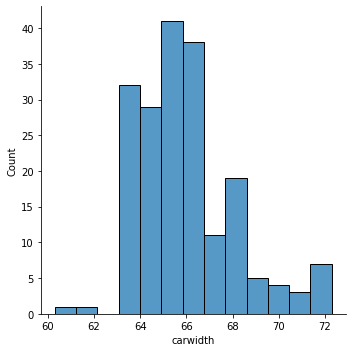

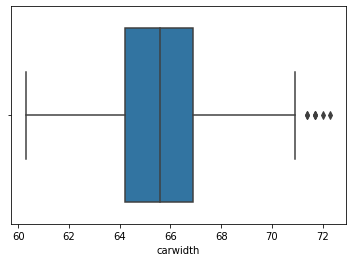

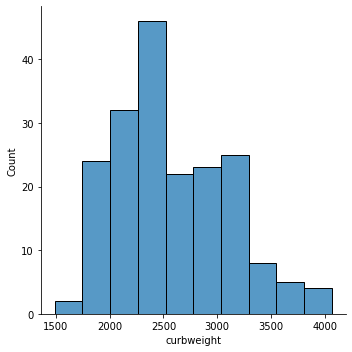

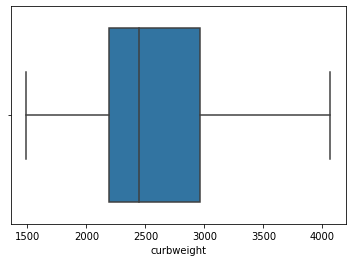

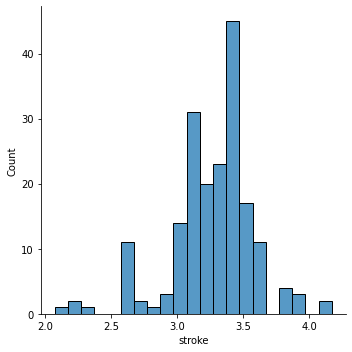

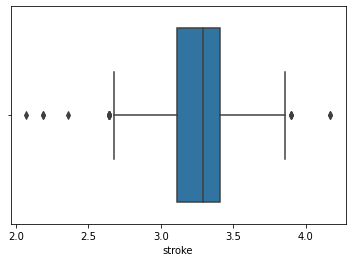

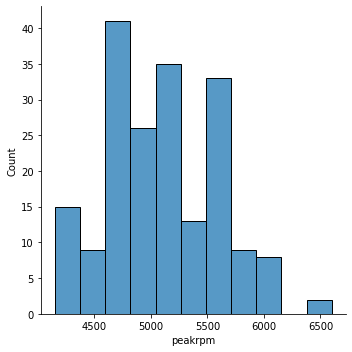

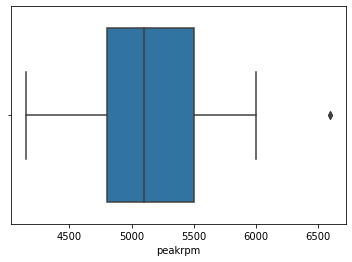

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

for feature in ['carwidth', 'curbweight', 'stroke', 'peakrpm']:
    sns.displot(x=df[feature])
    plt.show()
    sns.boxplot(x=df[feature])
    plt.show()

👇 Scale your Features

In [54]:
from sklearn.preprocessing import RobustScaler

r_scaler = RobustScaler()

r_scaler.fit(df[['carwidth', 'curbweight', 'stroke', 'peakrpm']])

df[['carwidth', 'curbweight', 'stroke', 'peakrpm']] = r_scaler.transform(df[['carwidth', 'curbweight', 'stroke', 'peakrpm']])

df.head()

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,-0.555556,0.135659,dohc,four,-2.033333,-0.142857,expensive
2,std,-0.037037,0.490956,ohcv,six,0.600000,-0.142857,expensive
3,std,0.106644,-0.136951,ohc,four,0.366667,0.571429,expensive
4,std,0.296296,0.492248,ohc,five,0.366667,0.571429,expensive
5,std,0.259259,0.082687,ohc,five,0.366667,0.571429,expensive


ℹ️ Robust Scaling all the numerical features is a quick and efficient way of scaling. It can be done as part of preliminary data preparation, in order to quickly get a model up and running. Obviously, we suggest to then investigate features in more depth, and to preprocess them accordingly.

## Encoding

👇 Manually encode the ordinal feature `cylindernumber`.

In [55]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [56]:
df['cylindernumber'] = df['cylindernumber'].map({
    'four':0.4,
    'six':0.6,
    'five':0.5,
    'three':0.3,
    'twelve':1.2,
    'two':0.2,
    'eight':0.8
})

df.head()

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,-0.555556,0.135659,dohc,0.4,-2.033333,-0.142857,expensive
2,std,-0.037037,0.490956,ohcv,0.6,0.600000,-0.142857,expensive
3,std,0.106644,-0.136951,ohc,0.4,0.366667,0.571429,expensive
4,std,0.296296,0.492248,ohc,0.5,0.366667,0.571429,expensive
5,std,0.259259,0.082687,ohc,0.5,0.366667,0.571429,expensive


👇 One hot Encode the multicategorical feature `enginetype`.


In [57]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [58]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

ohe.fit(df[['enginetype']])

OneHotEncoder(sparse=False)

In [59]:
ohe.categories_[0].tolist()

['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor']

In [60]:
feature_list = ohe.categories_[0].tolist()

In [61]:
# df['dohc'], df['dohcv'], df['l'] _____________ = ohe.transform()

In [62]:
df[feature_list] = ohe.transform(df[['enginetype']])

In [63]:
df.drop(columns='enginetype', inplace=True)
df.head()

,aspiration,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,std,-0.555556,0.135659,0.4,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,std,-0.037037,0.490956,0.6,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,std,0.106644,-0.136951,0.4,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,std,0.296296,0.492248,0.5,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,std,0.259259,0.082687,0.5,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


👇 Encode binary feature `aspiration`

In [64]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [65]:
ohe_asp = OneHotEncoder(sparse=False, drop='if_binary')

df['aspiration'] = ohe_asp.fit_transform(df[['aspiration']])

df.head()

,aspiration,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,0.0,-0.555556,0.135659,0.4,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,-0.037037,0.490956,0.6,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.106644,-0.136951,0.4,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.296296,0.492248,0.5,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.259259,0.082687,0.5,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


👇 Encode the target `price`

In [66]:
df['price'].unique()

array(['expensive', 'cheap'], dtype=object)

In [67]:
from sklearn.preprocessing import LabelEncoder

encoder_price = LabelEncoder()

df['price'] = encoder_price.fit_transform(df['price'])

# Modelling

👇 Cross-validate a Logistic Regression model.

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X = df.drop(columns='price')
y = df['price']

In [69]:
model = LogisticRegression()

scores = cross_val_score(model, X, y, cv=10)

scores.mean()

0.8692105263157895

👇 Train a model on the entire dataset.

In [70]:
trained_model = model.fit(X, y)

# Predicting

👇 Predict whether the following car is cheap or expensive.

In [71]:
car_specificities = ['std', 65.88793969849246, 1874.0, 'ohc', 'four', 3.11, 5400.0]

column_names = ['aspiration',
 'carwidth',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'stroke',
 'peakrpm']

new_car = pd.DataFrame(data = [car_specificities], columns = column_names)

new_car

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm
0,std,65.88794,1874.0,ohc,four,3.11,5400.0


⚠️ The **exact same transformations** made to the training data must be applied to the new data ⚠️

## Preparing new data point

ℹ️ We can use the same transformers since they stored constants used for transformations as attributes. Be careful to not `fit()` again, but only to `transform()` ⚠️

👇 Scaling

In [72]:
new_car[['carwidth', 'curbweight', 'stroke', 'peakrpm']] = r_scaler.transform(new_car[['carwidth', 'curbweight', 'stroke', 'peakrpm']])
new_car

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm
0,std,0.106644,-0.735142,ohc,four,-0.6,0.428571


👇 Encoding `cylindernumber`

In [73]:
new_car['cylindernumber'] = new_car['cylindernumber'].map({
    'four':0.4,
    'six':0.6,
    'five':0.5,
    'three':0.3,
    'twelve':1.2,
    'two':0.2,
    'eight':0.8
})
new_car

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm
0,std,0.106644,-0.735142,ohc,0.4,-0.6,0.428571


👇 Encode `enginetype`

In [74]:
new_car[feature_list] = ohe.transform(new_car[['enginetype']])
new_car

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,std,0.106644,-0.735142,ohc,0.4,-0.6,0.428571,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [75]:
new_car.drop(columns=['enginetype'], inplace=True)

👇 Encode `aspiration`

In [76]:
new_car['aspiration'] = ohe_asp.transform(new_car[['aspiration']])
new_car

,aspiration,carwidth,curbweight,cylindernumber,stroke,peakrpm,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,0.0,0.106644,-0.735142,0.4,-0.6,0.428571,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Predicting new data point

👇 Now that the new data point has been preprocessed in the exact same way, it can be fed to the model for prediction. 

ℹ️ The output can be decoded back to its original form with the original transformer. Any transformer has an `inverse_transform()` method.

In [77]:
trained_model.predict(new_car)

array([0])

In [81]:
encoder_price.inverse_transform([0])

array(['cheap'], dtype=object)

In [82]:
trained_model.predict_proba(new_car)

array([[0.77468136, 0.22531864]])

# 🏁